# Expected Sarsa


In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_q_values(Q, env, figsize=(15, 10)):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q_reshaped = np.zeros((num_states, num_actions))

    for (s, a), value in Q.items():
        Q_reshaped[s, a] = value

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(Q_reshaped, cmap='cool')

    for i in range(num_states):
        for j in range(num_actions):
            ax.text(j, i, f"{Q_reshaped[i, j]:.3f}", ha='center', va='center', fontsize=14)

    ax.set_xticks(np.arange(num_actions))
    ax.set_yticks(np.arange(num_states))
    ax.set_xticklabels([str(a) for a in range(num_actions)])
    ax.set_yticklabels([str(s) for s in range(num_states)])
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.title('Q-Table')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define epsilon-greedy policy

In [3]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return max(range(env.action_space.n), key=lambda a: Q[(state, a)])

In [4]:
# Create the FrozenLake environment using gym
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
num_episodes = 5000
num_timesteps = 1000
# Define a range of hyperparameter values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.8, 0.85, 0.9, 0.95, 1.0]
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]

In [6]:
best_result = float('inf')
best_hyperparameters = None

# Hyperparameter tuning loop
for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            Q = {}  # Initialize Q-values
            for s in range(env.observation_space.n):
                for a in range(env.action_space.n):
                    Q[(s, a)] = 0.0

            total_rewards = []
            success_count = 0  # Track successful episodes
            total_steps_to_goal = 0  # Track total steps to the goal
            total_exploration_steps = 0  # Track total exploration steps

            for i in range(num_episodes):
                s = env.reset()
                total_reward = 0
                steps_to_goal = 0
                exploration_steps = 0

                for t in range(num_timesteps):
                    a = epsilon_greedy(s, epsilon)
                    s_, r, done, _ = env.step(a)
                    expected_next_q = 0
                    for a_ in range(env.action_space.n):
                        expected_next_q += (1.0 / env.action_space.n) * Q[(s_, a_)]
                    Q[(s, a)] += alpha * (r + gamma * expected_next_q - Q[(s, a)])
                    total_reward += r
                    steps_to_goal += 1
                    exploration_steps += int(random.uniform(0, 1) < epsilon)

                    s = s_
                    if done:
                        break

                total_rewards.append(total_reward)
                total_steps_to_goal += steps_to_goal
                total_exploration_steps += exploration_steps

                if r == 1:  # If the episode was successful (goal reached)
                    success_count += 1

            average_reward = np.mean(total_rewards)
            success_rate = success_count / num_episodes
            average_steps_to_goal = total_steps_to_goal / num_episodes
            exploration_rate = total_exploration_steps / (num_episodes * num_timesteps)

            if average_steps_to_goal < best_result:
                best_result = average_steps_to_goal
                best_hyperparameters = (alpha, gamma, epsilon)
                best_Q = Q
                best_env = env

            print("Hyperparameters:", (alpha, gamma, epsilon))
            print("Average Reward:", average_reward)
            print("Success Rate:", success_rate)
            print("Average Steps to Goal:", average_steps_to_goal)
            print("Exploration Rate:", exploration_rate)
            print("-------------")

print("Best hyperparameters:", best_hyperparameters)
print("Best Average Steps to Goal:", best_result)

Hyperparameters: (0.1, 0.8, 0.1)
Average Reward: 0.0
Success Rate: 0.0
Average Steps to Goal: 15.0154
Exploration Rate: 0.0015142
-------------
Hyperparameters: (0.1, 0.8, 0.2)
Average Reward: 0.0168
Success Rate: 0.0168
Average Steps to Goal: 11.7068
Exploration Rate: 0.0023352
-------------
Hyperparameters: (0.1, 0.8, 0.3)
Average Reward: 0.0532
Success Rate: 0.0532
Average Steps to Goal: 9.3794
Exploration Rate: 0.0028216
-------------
Hyperparameters: (0.1, 0.8, 0.4)
Average Reward: 0.047
Success Rate: 0.047
Average Steps to Goal: 9.1288
Exploration Rate: 0.0036572
-------------
Hyperparameters: (0.1, 0.8, 0.5)
Average Reward: 0.0328
Success Rate: 0.0328
Average Steps to Goal: 8.8452
Exploration Rate: 0.0044084
-------------
Hyperparameters: (0.1, 0.85, 0.1)
Average Reward: 0.017
Success Rate: 0.017
Average Steps to Goal: 14.1158
Exploration Rate: 0.0014208
-------------
Hyperparameters: (0.1, 0.85, 0.2)
Average Reward: 0.0636
Success Rate: 0.0636
Average Steps to Goal: 10.7634
Exp

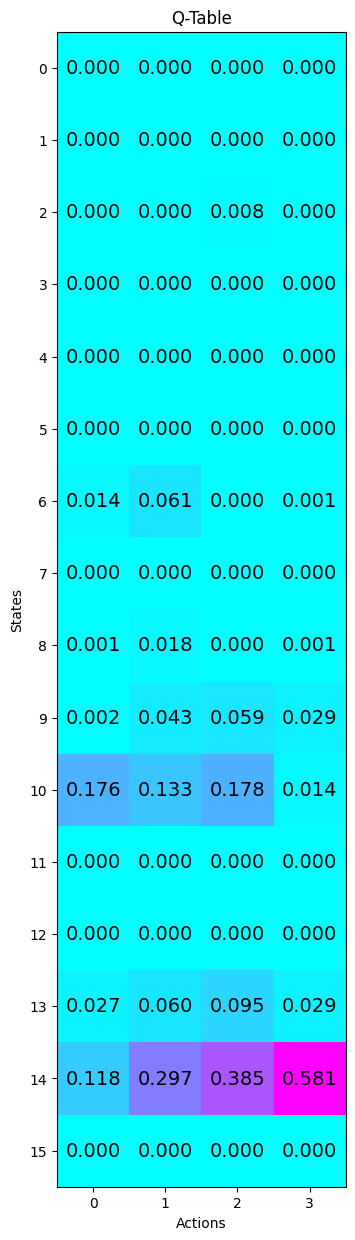

In [7]:
plot_q_values(best_Q, best_env, figsize=(20, 15))